## Final Project Submission

Please fill out:
* Student name: Andrew, Yasitha, and Kendall
* Student pace: full time
* Scheduled project review date/time: September 15, 2023 at 3:30PM EST
* Instructor name: David Elliott
* Blog post URL: TBD


# Imports and Orientation to the Data

In [375]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd 
import sqlite3 

In [376]:
cd zippedData

[WinError 2] The system cannot find the file specified: 'zippedData'
C:\Users\Jackson\Documents\flatiron\dsc-phase-2-project-v3\zippedData


In [377]:
info = pd.read_csv('rt.movie_info.tsv.gz', delimiter='\t')

In [482]:
budgets = pd.read_csv(r'tn.movie_budgets.csv.gz', compression='gzip')

In [484]:
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [487]:
duplicates = budgets.duplicated()
duplicates.value_counts()

False    5782
dtype: int64

In [379]:
tmdb = pd.read_csv('tmdb.movies.csv.gz')

In [380]:
gross = pd.read_csv('bom.movie_gross.csv.gz')

In [381]:
reviews = pd.read_csv('rt.reviews.tsv.gz', delimiter='\t', encoding='latin1')

In [382]:
cd im.db

C:\Users\Jackson\Documents\flatiron\dsc-phase-2-project-v3\zippedData\im.db


In [383]:
imdbconn = sqlite3.connect('im.db')

In [384]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [385]:
info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [386]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [387]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [410]:
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [388]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [451]:
#tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('99','Documentary')
#tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('18','Drama')
#tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('35','Comedy')
#tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('27','Horror')
#tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('53','Thriller')
#tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('10402','Music')
#tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('10749','Romance')
#tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('16','Animation')
#tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('878','Science Fiction')
#tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('28','Action')
#tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('10751','Family')
#tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('80','Crime')
#tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('36','History')
#tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('10770', 'TV Movie')
#tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('9648', 'Mystery')
#tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('14', 'Fantasy')
#tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('12', 'Adventure')
#tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('37', 'Western')
#tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('10752', 'War')

In [452]:
tmdb['genre_ids'].value_counts()

[Documentary]                                         3700
[]                                                    2479
[Drama]                                               2268
[Comedy]                                              1660
[Horror]                                              1145
                                                      ... 
[Drama, TV Movie, Crime]                                 1
[Drama, Horror, Action, Thriller, Science Fiction]       1
[Drama, Fantasy, Mystery, Romance]                       1
[Action, Horror, Thriller, Science Fiction]              1
[Adventure, Animation, Comedy, Family, Music]            1
Name: genre_ids, Length: 2477, dtype: int64

In [453]:
budgets_tmbd_merged = budgets.merge(tmdb, left_on='movie', right_on='title', how='inner')

In [454]:
budgets_tmbd_merged

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,6,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2470,"[Adventure, Action, Fantasy]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,14169,"[Action, Adventure, Science Fiction]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,23811,"[Adventure, Action, Fantasy]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
4,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,20623,"[Action, Adventure, Fantasy, Science Fiction]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,49,"Sep 1, 2015",Exeter,25000,0,489792,14678,"[Thriller, Horror]",226458,en,Exeter,5.934,2015-03-26,Exeter,4.7,121
2381,51,"Apr 21, 2015",Ten,25000,0,0,12326,"[Adventure, Horror, Mystery, Thriller]",279516,en,Ten,1.575,2014-03-28,Ten,5.4,5
2382,54,"Dec 31, 2014",Dry Spell,22000,0,0,10470,"[Comedy, Romance]",255266,en,Dry Spell,0.600,2013-02-14,Dry Spell,6.0,1
2383,56,"Jan 4, 2013",All Superheroes Must Die,20000,0,0,8893,"[Science Fiction, Thriller]",86304,en,All Superheroes Must Die,2.078,2013-01-04,All Superheroes Must Die,3.9,19


In [456]:
budgets_tmbd_merged['WW Gross-Budget'] = budgets_tmbd_merged['worldwide_gross'] - budgets_tmbd_merged['production_budget']

budgets_tmbd_merged['Ratio G-B to Budget'] = budgets_tmbd_merged['WW Gross-Budget'] / budgets_tmbd_merged['production_budget']

In [492]:
tmdb['original_title'].value_counts()

Eden                                   7
Home                                   6
Lucky                                  5
Truth or Dare                          5
Aftermath                              5
                                      ..
Where is Good?                         1
Tinker'                                1
Ang Dalawang Mrs. Reyes                1
Hailey Dean Mystery: 2 + 2 = Murder    1
Menatek Ha-maim                        1
Name: original_title, Length: 24835, dtype: int64

In [461]:
budgets_tmbd_merged.sort_values(by='Ratio G-B to Budget', ascending=False).head(30)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,WW Gross-Budget,Ratio G-B to Budget
2345,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,14362,"[Horror, Thriller]",299245,en,The Gallows,9.166,2015-07-10,The Gallows,4.8,591,41556474,415.564740
1876,77,"Oct 1, 1968",Night of the Living Dead,114000,12087064,30087064,13651,[Horror],295154,en,Night of the Living Dead,0.600,2014-10-24,Night of the Living Dead,6.5,1,29973064,262.921614
1324,37,"Oct 17, 1978",Halloween,325000,47000000,70000000,23894,"[Thriller, Horror]",424139,en,Halloween,20.839,2018-10-19,Halloween,6.4,2020,69675000,214.384615
2169,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,5444,"[Thriller, Horror]",76487,en,The Devil Inside,7.403,2012-01-06,The Devil Inside,4.7,441,100759490,100.759490
1544,78,"Feb 8, 1915",The Birth of a Nation,110000,10000000,11000000,21002,[Drama],339408,en,The Birth of a Nation,8.152,2016-10-07,The Birth of a Nation,6.5,328,10890000,99.000000
1543,78,"Feb 8, 1915",The Birth of a Nation,110000,10000000,11000000,17705,[Drama],339408,en,The Birth of a Nation,8.152,2016-10-07,The Birth of a Nation,6.5,328,10890000,99.000000
2298,69,"May 1, 1981",Graduation Day,250000,23894000,23894000,17086,[],450254,en,Graduation Day,0.600,2015-01-01,Graduation Day,5.0,1,23644000,94.576000
309,76,"Feb 15, 1950",Cinderella,2900000,85000000,263591415,6604,"[Comedy, Romance]",98604,ru,Zолушка,0.955,2012-06-06,Cinderella,4.6,8,260691415,89.893591
310,76,"Feb 15, 1950",Cinderella,2900000,85000000,263591415,14176,"[Romance, Fantasy, Family, Drama]",150689,en,Cinderella,29.056,2015-03-13,Cinderella,6.7,4517,260691415,89.893591
205,60,"Apr 23, 2009",Home,500000,15433,44793168,20455,[Drama],388223,en,Home,0.600,2016-03-17,Home,4.5,2,44293168,88.586336


In [471]:
budgets_tmbd_merged.groupby('genre_ids').mean().sort_values(by='Ratio G-B to Budget', ascending=False).head(20)

,id_x,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,id_y,popularity,vote_average,vote_count,WW Gross-Budget,Ratio G-B to Budget
genre_ids,,,,,,,,,,,
"[Horror, Mystery, Crime]",57.000000,1.200000e+06,5.596873e+07,1.038800e+08,11055.000000,176.000000,19.127000,7.400000,4795.000000,1.026800e+08,85.566689
"[Family, Crime, Drama]",30.000000,5.000000e+05,3.155956e+07,3.155956e+07,24138.000000,495193.000000,10.503000,7.000000,138.000000,3.105956e+07,62.119120
"[Romance, Fantasy, Family, Drama]",44.500000,4.895000e+07,1.430757e+08,3.990714e+08,14176.000000,150689.000000,29.056000,6.700000,4517.000000,3.501214e+08,47.260224
"[Fantasy, Comedy, Animation, Science Fiction, Family]",53.333333,4.750000e+07,5.913765e+07,1.435970e+08,14262.000000,228161.000000,12.835000,6.800000,2372.000000,9.609702e+07,29.851850
"[Drama, Mystery]",53.333333,4.750000e+07,5.913765e+07,1.435970e+08,3525.000000,79580.000000,1.823000,5.400000,11.000000,9.609702e+07,29.851850
"[Horror, Drama, Family]",53.333333,4.750000e+07,5.913765e+07,1.435970e+08,20446.000000,381507.000000,0.600000,4.700000,14.000000,9.609702e+07,29.851850
"[Science Fiction, Horror, Thriller]",67.000000,3.000000e+06,6.447312e+07,9.126658e+07,7888.000000,158015.000000,24.364000,6.200000,4797.000000,8.826658e+07,29.422194
"[Thriller, Mystery, Horror]",55.000000,5.000000e+06,6.726884e+07,1.488065e+08,17495.000000,345911.000000,12.408000,6.300000,2220.000000,1.438065e+08,28.761302
"[Mystery, Thriller, Horror]",64.500000,7.500000e+06,1.033027e+08,1.535458e+08,22284.500000,429222.500000,20.869000,5.750000,4736.000000,1.460458e+08,27.122977


In [468]:
genre_value_counts = budgets_tmbd_merged['genre_ids'].value_counts().head(12)
genre_value_counts.index

Index(['[Drama]', '[Comedy]', '[Documentary]', '[]', '[Comedy, Drama]',
       '[Horror]', '[Horror, Thriller]', '[Drama, Romance]',
       '[Drama, Thriller]', '[Comedy, Romance]', '[Drama, History]',
       '[Thriller]'],
      dtype='object')

In [390]:
#foreign gross has null values
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [508]:
reviews['top_critic'].value_counts()

0    41336
1    13096
Name: top_critic, dtype: int64

In [391]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [392]:
pd.read_sql("""
SELECT *
FROM SQLITE_SCHEMA
""", imdbconn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


# Data Cleaning

In [523]:
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace(',', '')
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace('$', '')
budgets['worldwide_gross'] = budgets['worldwide_gross'].apply(lambda x: int(x))

In [524]:
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace(',', '')
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace('$', '')
budgets['domestic_gross'] = budgets['domestic_gross'].apply(lambda x: int(x))

In [525]:
budgets['production_budget'] = budgets['production_budget'].str.replace(',', '')
budgets['production_budget'] = budgets['production_budget'].str.replace('$', '')
budgets['production_budget'] = budgets['production_budget'].apply(lambda x: int(x))

In [526]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [397]:
budgets.loc[budgets['id'] == 57]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
56,57,"Jun 24, 2011",Cars 2,200000000,191450875,560155383
156,57,"Mar 4, 2016",Zootopia,150000000,341268248,1019429616
256,57,"Nov 18, 2011","The Twilight Saga: Breaking Dawn, Part 1",127500000,281287133,689420051
356,57,"May 23, 2013",The Hangover 3,103000000,112200072,362000072
456,57,"Jun 8, 2001",Atlantis: The Lost Empire,90000000,84052762,186049020
556,57,"Jul 12, 2002",Road to Perdition,80000000,104054514,183354514
656,57,"Jul 21, 2006",Lady in the Water,75000000,42285169,72785169
756,57,"Feb 25, 2011",Hall Pass,68000000,45060734,87173475
856,57,"Dec 18, 1998",The Prince of Egypt,60000000,101413188,218613188
956,57,"Dec 25, 2014",American Sniper,58000000,350126372,547326372


In [398]:
worldwide_gross_sorted = budgets.sort_values(by='worldwide_gross', ascending=False)

In [399]:
worldwide_gross_sorted.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864


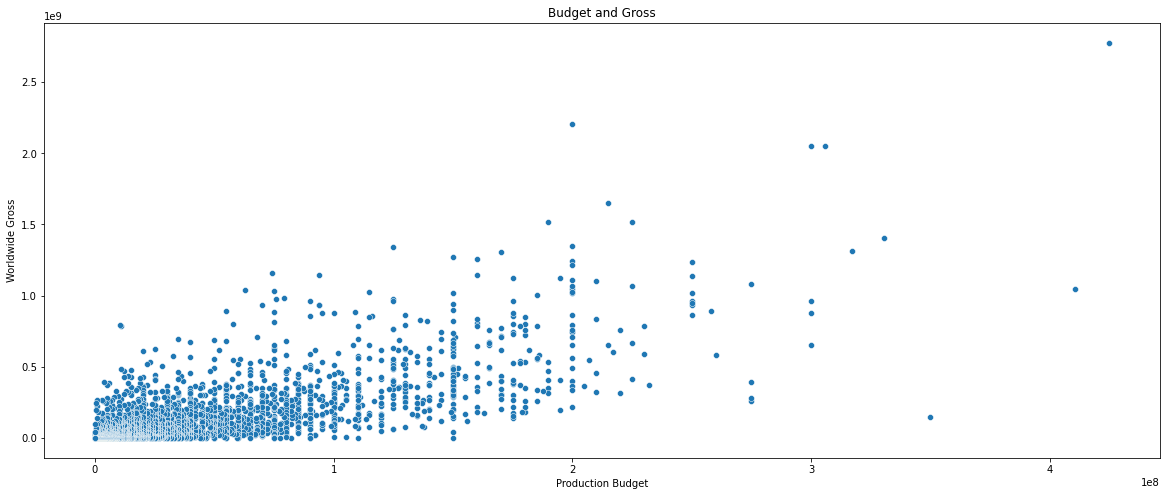

In [400]:
fig, ax = plt.subplots(figsize=(20,8))

sns.scatterplot(x=budgets['production_budget'], y=budgets['worldwide_gross'])

ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide Gross')
ax.set_title('Budget and Gross');

In [401]:
budgets['worldwide_gross'].values

array([2776345279, 1045663875,  149762350, ...,       1338,          0,
           181041], dtype=int64)

In [402]:
result = stats.ttest_ind(budgets['production_budget'].values, budgets['worldwide_gross'].values, equal_var=True)

In [403]:
result

Ttest_indResult(statistic=-25.352947586831252, pvalue=4.7264202307731374e-138)

This is a tiny p-value. We can reject the null hypothesis and assume there is a less than .1% chance that a statistic at least this large would occur if no correlation between production budget and worldwide gross existed.

In [404]:
cd ..

C:\Users\Jackson\Documents\flatiron\dsc-phase-2-project-v3\zippedData


In [405]:
ls

 Volume in drive C is OS
 Volume Serial Number is 8EF7-A13E

 Directory of C:\Users\Jackson\Documents\flatiron\dsc-phase-2-project-v3\zippedData

09/12/2023  08:53 AM    <DIR>          .
09/12/2023  01:38 PM    <DIR>          ..
09/11/2023  04:38 PM            53,544 bom.movie_gross.csv.gz
09/11/2023  04:40 PM    <DIR>          im.db
09/11/2023  04:38 PM        67,149,708 im.db.zip
09/11/2023  04:38 PM           498,202 rt.movie_info.tsv.gz
09/11/2023  04:38 PM         3,402,194 rt.reviews.tsv.gz
09/11/2023  04:38 PM           827,840 tmdb.movies.csv.gz
09/11/2023  04:38 PM           153,218 tn.movie_budgets.csv.gz
               6 File(s)     72,084,706 bytes
               3 Dir(s)  35,898,093,568 bytes free


In [406]:
budgets_tmdb = budgets.merge(tmdb, left_on='movie', right_on='title', how='inner')

In [407]:
budgets_tmdb.sort_values(by='popularity', ascending=False).head(30)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
880,6,"Oct 24, 2014",John Wick,30000000,43037835,76235001,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
17,22,"Dec 17, 2014",The Hobbit: The Battle of the Five Armies,250000000,255119788,945577621,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
20,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
21,35,"Aug 14, 1998",The Avengers,60000000,23385416,48585416,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
99,14,"Aug 1, 2014",Guardians of the Galaxy,170000000,333172112,770867516,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
73,80,"Oct 6, 2017",Blade Runner 2049,185000000,92054159,259357408,20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
74,80,"Oct 6, 2017",Blade Runner 2049,185000000,92054159,259357408,23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
54,60,"Nov 16, 2018",Fantastic Beasts: The Crimes of Grindelwald,200000000,159555901,652220086,23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
91,99,"Jul 7, 2017",Spider-Man: Homecoming,175000000,334201140,880166350,20618,"[28, 12, 878, 18]",315635,en,Spider-Man: Homecoming,46.775,2017-07-07,Spider-Man: Homecoming,7.4,11585


In [40]:
movie_basics = pd.read_sql("""
SELECT *
FROM movie_basics
""", imdbconn)

In [96]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [151]:
movie_basics.sort_values(by='start_year').head(20)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
9599,tt1566491,Brainiacs in La La Land,Brainiacs in La La Land,2010,NaN,Comedy
43264,tt2578092,Fireplace for your Home: Crackling Fireplace w...,Fireplace for your Home: Crackling Fireplace w...,2010,61.0,Music
11550,tt1634300,Role/Play,Role/Play,2010,85.0,"Drama,Romance"
11551,tt1634332,Johan1,Johan Primero,2010,78.0,"Comedy,Drama,Romance"
11552,tt1634334,Hands Up,Les mains en l'air,2010,90.0,Drama
11553,tt1634337,Que devient mon souvenir quand tu n'y penses pas,Que devient mon souvenir quand tu n'y penses pas,2010,45.0,Documentary
11554,tt1634519,The Black Eyed Peas: The E.N.D. World Tour Live,The Black Eyed Peas: The E.N.D. World Tour Live,2010,NaN,"Documentary,Music"
11555,tt1634524,Jitters,Órói,2010,93.0,"Drama,Romance"
11556,tt1634540,Rescue Men: The Story of the Pea Island Lifesa...,Rescue Men: The Story of the Pea Island Lifesa...,2010,90.0,Documentary
11557,tt1634554,Janakan,Janakan,2010,150.0,"Crime,Thriller"


In [42]:
pd.read_sql("""
SELECT *
FROM directors
""", imdbconn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [43]:
pd.read_sql("""
SELECT *
FROM known_for
""", imdbconn)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [44]:
pd.read_sql("""
SELECT *
FROM movie_akas
""", imdbconn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [45]:
pd.read_sql("""
SELECT *
FROM movie_ratings
""", imdbconn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [46]:
pd.read_sql("""
SELECT *
FROM persons
""", imdbconn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [47]:
pd.read_sql("""
SELECT *
FROM principals
""", imdbconn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [48]:
pd.read_sql("""
SELECT *
FROM writers
""", imdbconn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [276]:
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [277]:
merged_basics_and_budgets = budgets.merge(movie_basics, left_on='movie', right_on='primary_title', how='left')

In [278]:
merged_basics_and_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7216,78,"Dec 31, 2018",Red 11,7000,0,0,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller"
7217,79,"Apr 2, 1999",Following,6000,48482,240495,NaN,NaN,NaN,NaN,NaN,NaN
7218,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,NaN,NaN,NaN,NaN,NaN,NaN
7219,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,tt2107644,A Plague So Pleasant,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller"


In [279]:
merged_basics_and_budgets['movie'].value_counts()[0:30]

Home             72
Brothers         26
The Gift         26
The Return       20
Crossroads       18
Hamlet           16
Cinderella       14
Freedom          14
The Island       14
The Journey      11
Robin Hood       10
Pinocchio        10
The Promise      10
Trapped          10
The Calling      10
Life             10
Silence          10
The Gambler      10
Forget Me Not    10
The Wall         10
Wolf              9
Eden              9
Sunday            8
Stuck             8
Wonderland        8
Unforgettable     8
Inside Out        8
Closure           8
The Square        8
Coming Home       8
Name: movie, dtype: int64

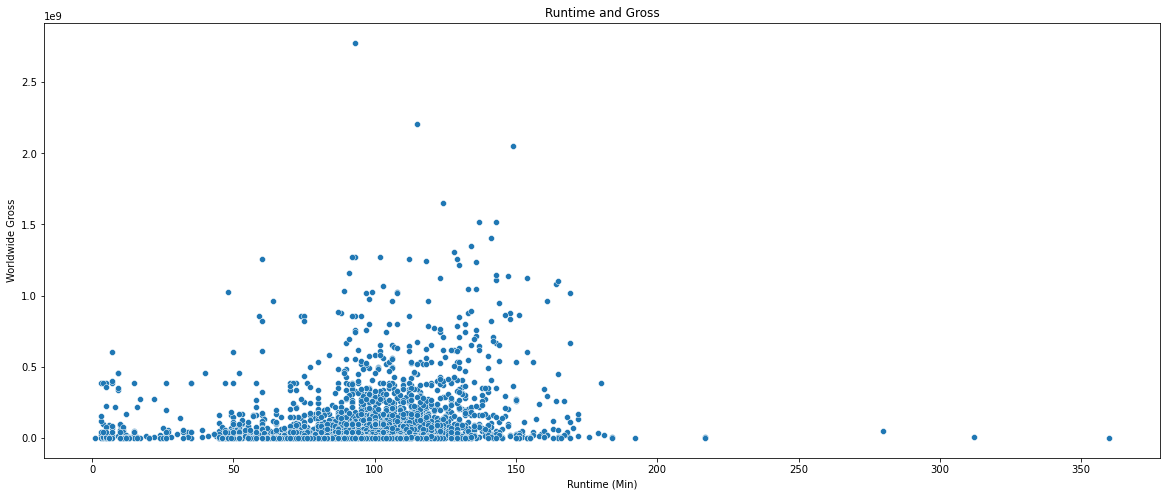

In [280]:
fig, ax = plt.subplots(figsize=(20,8))

sns.scatterplot(x=merged_basics_and_budgets['runtime_minutes'], y=merged_basics_and_budgets['worldwide_gross'])

ax.set_xlabel('Runtime (Min)')
ax.set_ylabel('Worldwide Gross')
ax.set_title('Runtime and Gross');

In [472]:
merged_basics_and_budgets['genres'].value_counts().head(21)

Drama                         497
Documentary                   290
Comedy                        140
Comedy,Drama                  104
Horror                         95
Drama,Romance                  89
Comedy,Drama,Romance           84
Thriller                       81
Adventure,Animation,Comedy     73
Action,Crime,Drama             63
Drama,Thriller                 63
Comedy,Romance                 59
Action,Adventure,Sci-Fi        58
Horror,Thriller                56
Horror,Mystery,Thriller        47
Action                         46
Action,Adventure,Fantasy       41
Crime,Drama,Thriller           39
Action,Comedy,Crime            37
Action,Adventure,Drama         34
Action,Adventure,Comedy        33
Name: genres, dtype: int64

In [282]:
genres_groupby_mean = merged_basics_and_budgets.groupby('genres').mean()

In [283]:
genres_groupby_mean

,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes
genres,,,,,,
Action,47.565217,3.327935e+07,2.761465e+07,6.294143e+07,2014.543478,96.625000
"Action,Adventure",62.000000,5.369533e+07,5.604961e+07,1.277316e+08,2016.333333,110.000000
"Action,Adventure,Animation",45.941176,1.151471e+08,1.567252e+08,4.374047e+08,2014.058824,100.294118
"Action,Adventure,Biography",25.400000,7.100000e+07,5.671719e+07,1.880822e+08,2015.600000,129.200000
"Action,Adventure,Comedy",49.000000,8.051515e+07,1.115445e+08,2.975305e+08,2015.212121,108.125000
...,...,...,...,...,...,...
"Sci-Fi,Thriller",62.500000,1.787750e+07,2.608027e+07,4.269099e+07,2016.125000,83.428571
Sport,31.333333,3.066667e+07,1.455115e+07,2.802947e+07,2015.000000,114.000000
Thriller,49.123457,2.592334e+07,2.526353e+07,5.664000e+07,2014.308642,87.803571


In [284]:
merged_basics_and_budgets.loc[merged_basics_and_budgets['id'] == 56]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
62,56,"May 2, 2014",The Amazing Spider-Man 2,200000000,202853933,708996336,tt1872181,The Amazing Spider-Man 2,The Amazing Spider-Man 2,2014.0,142.0,"Action,Adventure,Sci-Fi"
180,56,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,tt1323045,Frozen,Frozen,2010.0,93.0,"Adventure,Drama,Sport"
181,56,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,tt1611845,Frozen,Wai nei chung ching,2010.0,92.0,"Fantasy,Romance"
182,56,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,tt2294629,Frozen,Frozen,2013.0,102.0,"Adventure,Animation,Comedy"
311,56,"Feb 22, 2019",How to Train Your Dragon: The Hidden World,129000000,160791800,519258283,tt2386490,How to Train Your Dragon: The Hidden World,How to Train Your Dragon: The Hidden World,2019.0,104.0,"Action,Adventure,Animation"
...,...,...,...,...,...,...,...,...,...,...,...,...
6658,56,"Aug 11, 2009",London to Brighton,825000,0,610776,NaN,NaN,NaN,NaN,NaN,NaN
6791,56,"Jan 1, 1991",Johnny Suede,500000,55000,55000,NaN,NaN,NaN,NaN,NaN,NaN
6950,56,"May 6, 2005",Fighting Tommy Riley,300000,10514,10514,NaN,NaN,NaN,NaN,NaN,NaN
7078,56,"Jan 1, 1971",Sweet Sweetback's Baad Asssss Song,150000,15200000,15200000,NaN,NaN,NaN,NaN,NaN,NaN


In [285]:
duplicates = merged_basics_and_budgets[merged_basics_and_budgets.duplicated()]
print(len(duplicates))

0


In [286]:
top_5_genres = genres_groupby_mean.sort_values(by='worldwide_gross', ascending=False).head(5)
top_5_genres['worldwide_gross'] = top_5_genres['worldwide_gross'].astype(int)
top_5_genres

,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes
genres,,,,,,
"Adventure,Drama,Sport",56.000000,1.500000e+08,4.007380e+08,1272469910,2010.000000,93.000000
"Fantasy,Romance",56.000000,1.500000e+08,4.007380e+08,1272469910,2010.000000,92.000000
"Family,Fantasy,Musical",60.500000,9.000000e+07,4.400357e+08,933815419,2017.500000,94.500000
"Adventure,Fantasy",36.333333,2.316667e+08,1.928914e+08,701210693,2013.333333,139.666667
"Action,Adventure,Sci-Fi",48.758621,1.606103e+08,2.203234e+08,599130207,2014.500000,126.862069


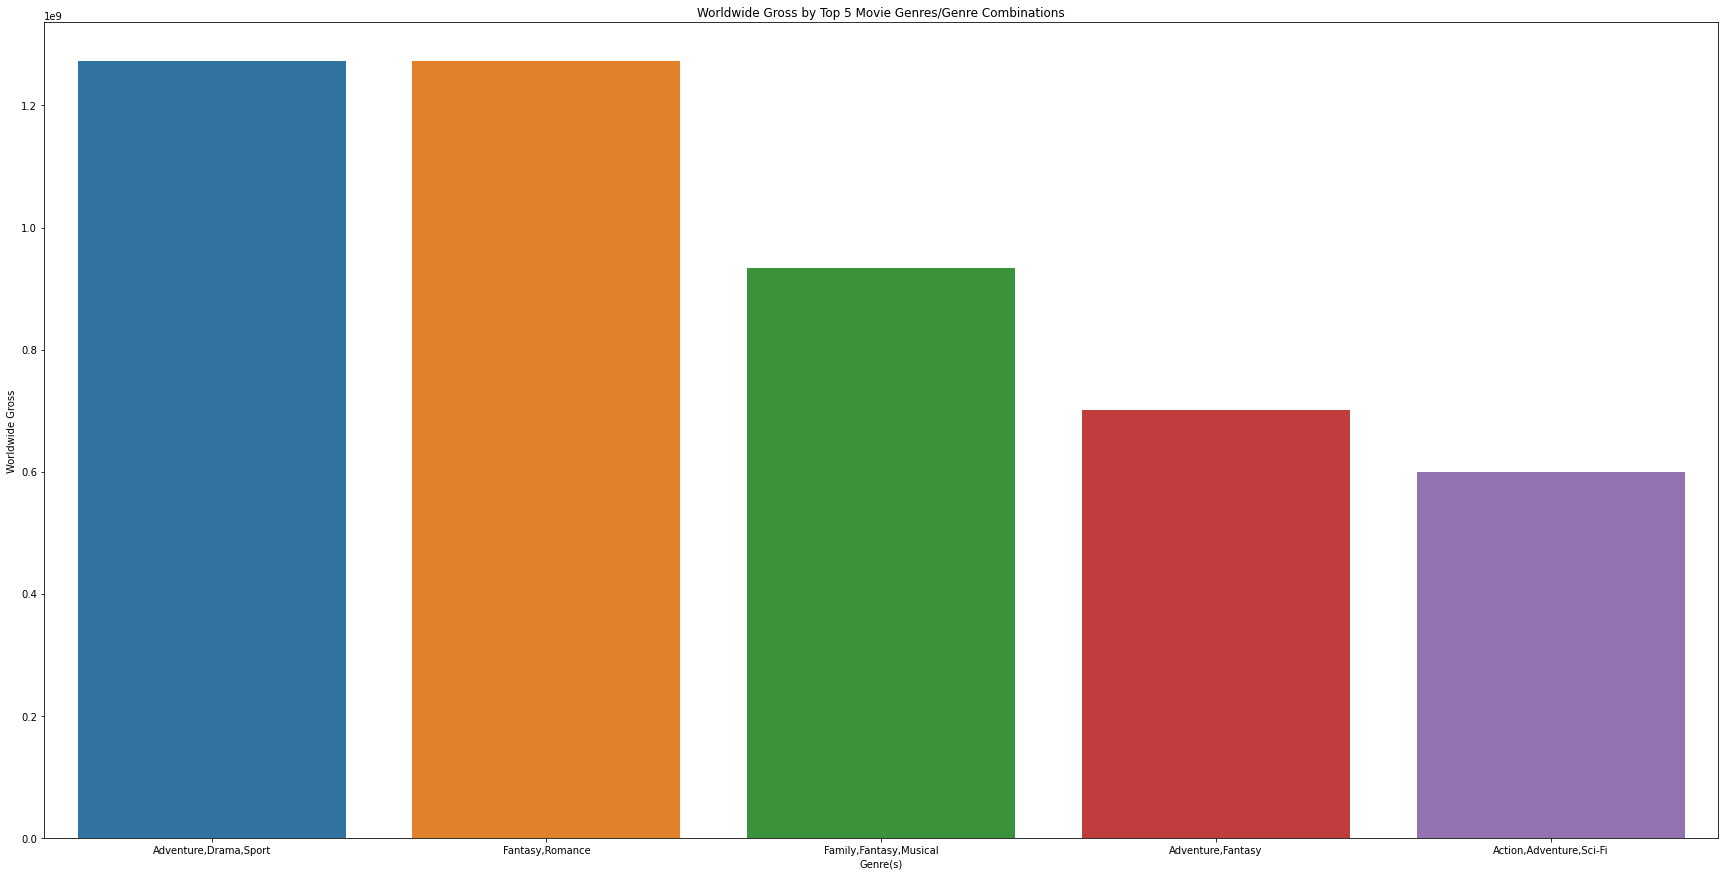

In [287]:
fig, ax = plt.subplots(figsize=(30,15))

sns.barplot(x=top_5_genres.index, y=top_5_genres['worldwide_gross'])

ax.set_title('Worldwide Gross by Top 5 Movie Genres/Genre Combinations')
ax.set_xlabel('Genre(s)')
ax.set_ylabel('Worldwide Gross');

In [288]:
merged_basics_and_budgets['release_date'] = pd.to_datetime(merged_basics_and_budgets['release_date'])

merged_basics_and_budgets['month_release'] = merged_basics_and_budgets['release_date'].dt.month

In [289]:
merged_basics_and_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,month_release
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,NaN,NaN,NaN,NaN,NaN,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7216,78,2018-12-31,Red 11,7000,0,0,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",12
7217,79,1999-04-02,Following,6000,48482,240495,NaN,NaN,NaN,NaN,NaN,NaN,4
7218,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,NaN,NaN,NaN,NaN,NaN,NaN,7
7219,81,2015-09-29,A Plague So Pleasant,1400,0,0,tt2107644,A Plague So Pleasant,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller",9


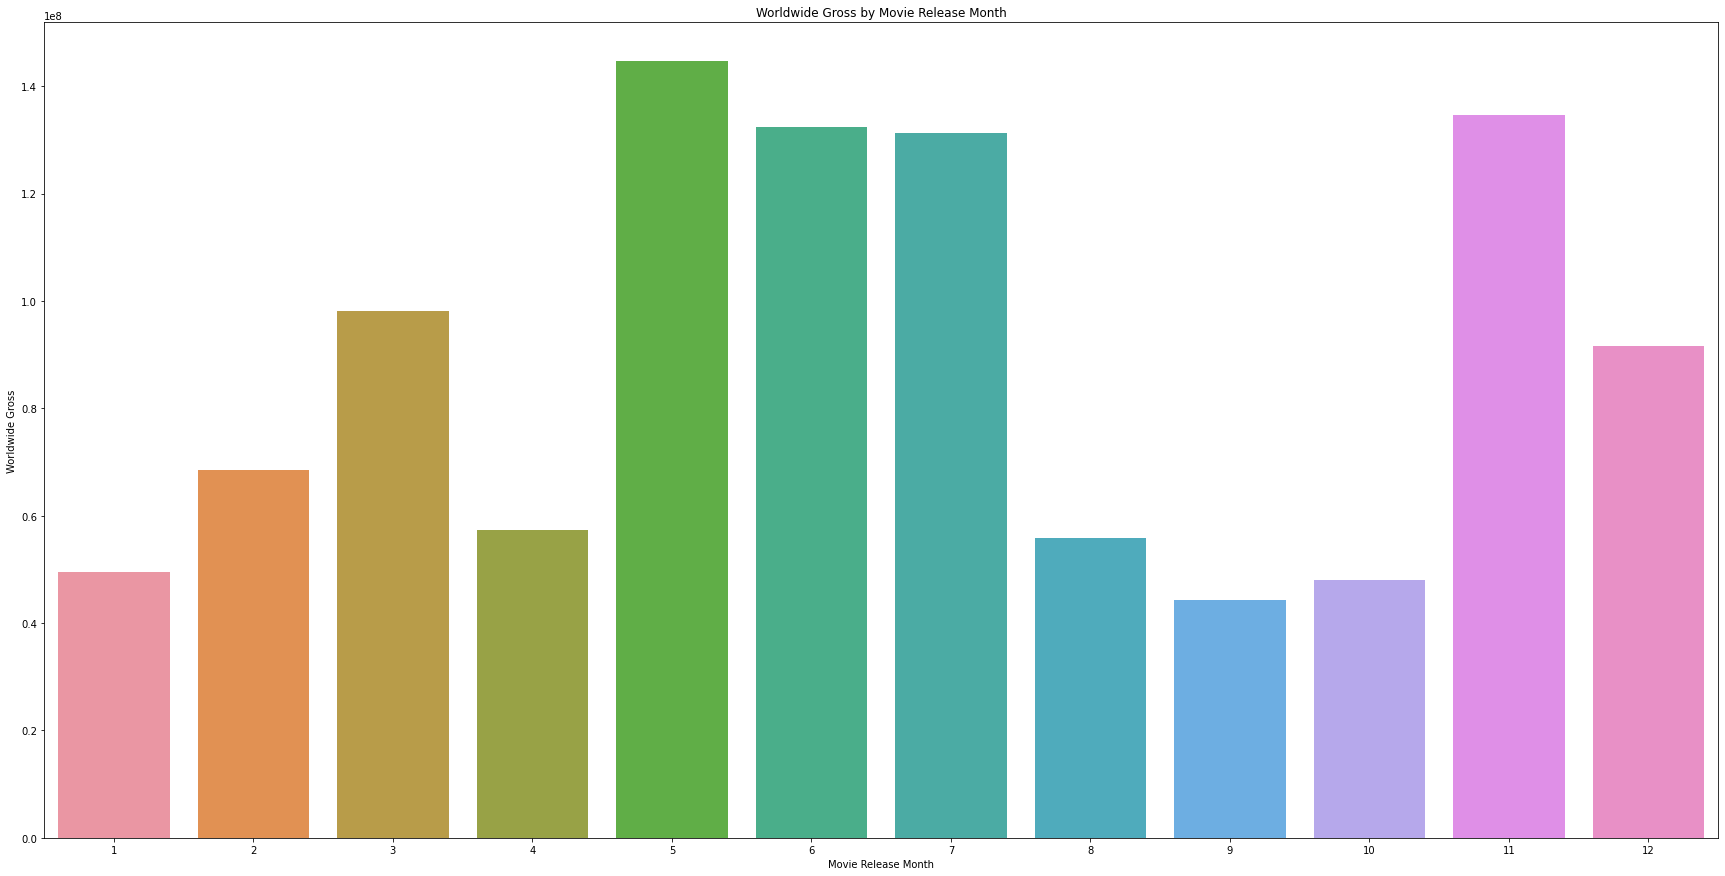

In [290]:
fig, ax = plt.subplots(figsize=(30,15))

sns.barplot(x=release_month_means.index, y=release_month_means['worldwide_gross'])

ax.set_title('Worldwide Gross by Movie Release Month')
ax.set_xlabel('Movie Release Month')
ax.set_ylabel('Worldwide Gross');

In [291]:
merged_basics_and_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,month_release
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,NaN,NaN,NaN,NaN,NaN,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7216,78,2018-12-31,Red 11,7000,0,0,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",12
7217,79,1999-04-02,Following,6000,48482,240495,NaN,NaN,NaN,NaN,NaN,NaN,4
7218,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,NaN,NaN,NaN,NaN,NaN,NaN,7
7219,81,2015-09-29,A Plague So Pleasant,1400,0,0,tt2107644,A Plague So Pleasant,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller",9


In [292]:
merged_basics_and_budgets.groupby('genres').mean()

,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,month_release
genres,,,,,,,
Action,47.565217,3.327935e+07,2.761465e+07,6.294143e+07,2014.543478,96.625000,7.065217
"Action,Adventure",62.000000,5.369533e+07,5.604961e+07,1.277316e+08,2016.333333,110.000000,9.333333
"Action,Adventure,Animation",45.941176,1.151471e+08,1.567252e+08,4.374047e+08,2014.058824,100.294118,5.941176
"Action,Adventure,Biography",25.400000,7.100000e+07,5.671719e+07,1.880822e+08,2015.600000,129.200000,10.200000
"Action,Adventure,Comedy",49.000000,8.051515e+07,1.115445e+08,2.975305e+08,2015.212121,108.125000,6.393939
...,...,...,...,...,...,...,...
"Sci-Fi,Thriller",62.500000,1.787750e+07,2.608027e+07,4.269099e+07,2016.125000,83.428571,7.125000
Sport,31.333333,3.066667e+07,1.455115e+07,2.802947e+07,2015.000000,114.000000,8.000000
Thriller,49.123457,2.592334e+07,2.526353e+07,5.664000e+07,2014.308642,87.803571,6.975309


In [293]:
merged_basics_and_budgets['WW Gross-Budget'] = merged_basics_and_budgets['worldwide_gross'] - merged_basics_and_budgets['production_budget']

In [294]:
merged_basics_and_budgets.sort_values(by='WW Gross-Budget', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,month_release,WW Gross-Budget
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,12,2351345279
46,43,1997-12-19,Titanic,200000000,659363944,2208208395,tt2495766,Titanic,Titanic,2012.0,NaN,Adventure,12,2008208395
47,43,1997-12-19,Titanic,200000000,659363944,2208208395,tt8852130,Titanic,Titanic,2018.0,115.0,Family,12,2008208395
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",4,1748134200
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,NaN,NaN,NaN,NaN,NaN,NaN,12,1747311220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,53,2001-04-27,Town & Country,105000000,6712451,10364769,NaN,NaN,NaN,NaN,NaN,NaN,4,-94635231
410,42,2019-06-14,Men in Black: International,110000000,3100000,3100000,tt2283336,Men in Black: International,Men in Black: International,2019.0,115.0,"Action,Adventure,Comedy",6,-106900000
221,94,2011-03-11,Mars Needs Moms,150000000,21392758,39549758,tt1305591,Mars Needs Moms,Mars Needs Moms,2011.0,88.0,"Adventure,Animation,Family",3,-110450242
222,95,2020-12-31,Moonfall,150000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,12,-150000000


In [295]:
merged_basics_and_budgets['Ratio G-B to Budget'] = merged_basics_and_budgets['WW Gross-Budget'] / merged_basics_and_budgets['production_budget']

In [509]:
top_15_sorted_by_ratio.describe()

,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,month_release,WW Gross-Budget,Ratio G-B to Budget
count,15.000000,15.000000,1.500000e+01,1.500000e+01,6.000000,5.000000,15.000000,1.500000e+01,15.000000
mean,44.133333,380733.333333,5.912639e+07,1.098834e+08,2015.333333,92.000000,7.666667,1.095027e+08,399.973499
std,31.006605,370679.389127,5.082597e+07,9.700786e+07,2.581989,29.908193,2.742956,9.667321e+07,399.730072
min,7.000000,7000.000000,2.040920e+06,2.041928e+06,2013.000000,58.000000,2.000000,2.034928e+06,179.180180
25%,12.500000,82500.000000,1.180822e+07,2.832975e+07,2013.250000,79.000000,6.500000,2.820275e+07,219.192308
50%,46.000000,200000.000000,4.500000e+07,7.000000e+07,2014.500000,81.000000,8.000000,6.967500e+07,290.704000
75%,73.500000,688500.000000,1.114594e+08,2.095915e+08,2017.250000,106.000000,10.000000,2.088665e+08,414.199037
max,93.000000,1000000.000000,1.405391e+08,2.680000e+08,2019.000000,136.000000,11.000000,2.671420e+08,1799.000000


In [296]:
top_15_sorted_by_ratio = merged_basics_and_budgets.sort_values(by='Ratio G-B to Budget', ascending=False).head(15)
top_15_sorted_by_ratio

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,month_release,WW Gross-Budget,Ratio G-B to Budget
7179,46,1972-06-30,Deep Throat,25000,45000000,45000000,NaN,NaN,NaN,NaN,NaN,NaN,6,44975000,1799.000000
7023,14,1980-03-21,Mad Max,200000,8750000,99750000,NaN,NaN,NaN,NaN,NaN,NaN,3,99550000,497.750000
6872,93,2009-09-25,Paranormal Activity,450000,107918810,194183034,NaN,NaN,NaN,NaN,NaN,NaN,9,193733034,430.517853
7102,80,2015-07-10,The Gallows,100000,22764410,41656474,tt2309260,The Gallows,The Gallows,2015.0,81.0,"Horror,Mystery,Thriller",7,41556474,415.564740
6731,7,1999-07-14,The Blair Witch Project,600000,140539099,248300000,NaN,NaN,NaN,NaN,NaN,NaN,7,247700000,412.833333
7141,10,2004-05-07,Super Size Me,65000,11529368,22233808,NaN,NaN,NaN,NaN,NaN,NaN,5,22168808,341.058585
6648,47,1942-08-13,Bambi,858000,102797000,268000000,tt2668120,Bambi,Bambi,2013.0,58.0,"Biography,Documentary",8,267142000,311.354312
7212,74,1993-02-26,El Mariachi,7000,2040920,2041928,NaN,NaN,NaN,NaN,NaN,NaN,2,2034928,290.704000
7099,77,1968-10-01,Night of the Living Dead,114000,12087064,30087064,tt3393372,Night of the Living Dead,Night of the Living Dead,2014.0,79.0,Horror,10,29973064,262.921614
6493,11,1976-11-21,Rocky,1000000,117235147,225000000,tt3080284,Rocky,Rocky,2013.0,136.0,"Action,Comedy,Drama",11,224000000,224.000000


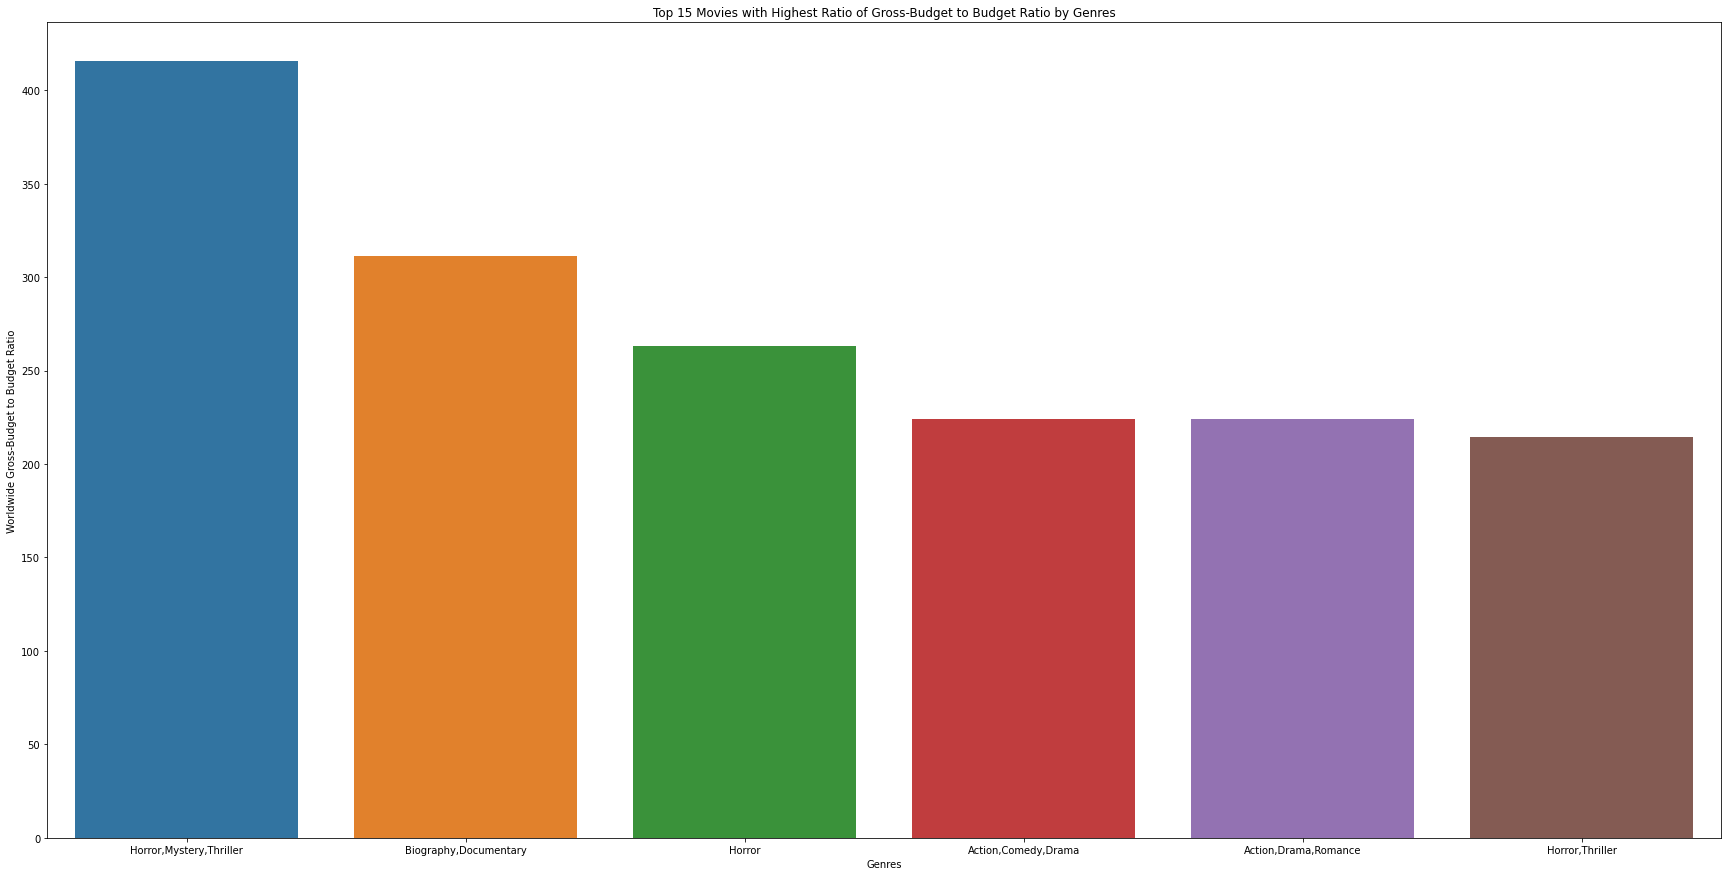

In [297]:
fig, ax = plt.subplots(figsize=(30,15))

sns.barplot(x=top_15_sorted_by_ratio['genres'], y=top_15_sorted_by_ratio['Ratio G-B to Budget'])

ax.set_title('Top 15 Movies with Highest Ratio of Gross-Budget to Budget Ratio by Genres')
ax.set_xlabel('Genres')
ax.set_ylabel('Worldwide Gross-Budget to Budget Ratio');

In [298]:
merged_basics_and_budgets['genres'].values

array(['Horror', 'Action,Adventure,Fantasy', 'Action,Adventure,Sci-Fi',
       ..., nan, 'Drama,Horror,Thriller', nan], dtype=object)

In [300]:
merged_basics_and_budgets.groupby('genres').mean().sort_values(by='Ratio G-B to Budget', ascending=False)

,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,month_release,WW Gross-Budget,Ratio G-B to Budget
genres,,,,,,,,,
"Animation,Family",54.500000,3244000.0,9.246274e+07,9.246274e+07,2015.50,58.000,10.000000,8.921874e+07,61.138940
"Drama,Family,Fantasy",44.500000,48950000.0,1.430757e+08,3.990714e+08,2015.00,105.000,2.500000,3.501214e+08,47.260224
"Action,History,War",53.333333,47500000.0,5.913765e+07,1.435970e+08,2012.00,NaN,4.333333,9.609702e+07,29.851850
"Action,Comedy,Drama",40.000000,14737500.0,2.948008e+07,7.451666e+07,2013.25,104.125,7.000000,5.977916e+07,29.045600
"Horror,Romance,Thriller",91.000000,3500000.0,4.141102e+07,9.512734e+07,2013.00,85.000,4.000000,9.162734e+07,26.179241
...,...,...,...,...,...,...,...,...,...
"Documentary,Drama,Reality-TV",22.000000,1000000.0,0.000000e+00,0.000000e+00,2016.00,80.000,4.000000,-1.000000e+06,-1.000000
"Documentary,Horror",96.000000,700000.0,0.000000e+00,0.000000e+00,2011.00,52.000,3.000000,-7.000000e+05,-1.000000
"Horror,Musical",87.000000,500000.0,0.000000e+00,0.000000e+00,2016.00,97.000,8.000000,-5.000000e+05,-1.000000


In [301]:
merged_basics_and_budgets.groupby('month_release').mean().sort_values(by='Ratio G-B to Budget', ascending=False)

,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,WW Gross-Budget,Ratio G-B to Budget
month_release,,,,,,,,
4,49.415282,2.389582e+07,2.534368e+07,5.734470e+07,2014.335227,94.145215,3.344888e+07,5.842154
6,52.422951,4.106669e+07,6.114686e+07,1.324797e+08,2014.185535,94.785455,9.141304e+07,5.463992
7,50.733591,3.951422e+07,5.608985e+07,1.313219e+08,2014.011628,98.474790,9.180768e+07,4.733205
2,50.556000,2.696911e+07,3.433443e+07,6.842929e+07,2014.577778,96.206140,4.146018e+07,4.286659
8,53.089109,2.401390e+07,2.936755e+07,5.586118e+07,2014.125828,94.869403,3.184728e+07,3.909628
11,48.340870,4.247848e+07,5.764630e+07,1.347017e+08,2014.380952,101.637405,9.222320e+07,3.789298
5,50.124748,4.383265e+07,6.039423e+07,1.446728e+08,2014.180000,100.354260,1.008401e+08,3.779675
1,51.339450,2.023797e+07,2.564825e+07,4.944436e+07,2014.367089,98.577465,2.920639e+07,3.710537
10,50.333807,2.050084e+07,2.286328e+07,4.796433e+07,2014.334247,98.069182,2.746349e+07,3.709292


In [302]:
merged_basics_and_budgets.loc[merged_basics_and_budgets['runtime_minutes'] > 100]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,month_release,WW Gross-Budget,Ratio G-B to Budget
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",5,635063875,1.546673
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",6,-200237650,-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",5,1072413963,3.243841
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",4,1748134200,5.827114
8,9,2017-11-17,Justice League,300000000,229024295,655945209,tt0974015,Justice League,Justice League,2017.0,120.0,"Action,Adventure,Fantasy",11,355945209,1.186484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7114,92,2012-05-18,Indie Game: The Movie,100000,0,0,tt1942884,Indie Game: The Movie,Indie Game: The Movie,2012.0,103.0,"Documentary,Drama",5,-100000,-1.000000
7133,4,2014-07-25,Happy Christmas,70000,30312,30312,tt2076215,Happy Christmas,Happy Christmas,2011.0,109.0,None,7,-39688,-0.566971
7151,20,2015-07-31,Counting,50000,8374,8374,tt4462082,Counting,Counting,2015.0,111.0,Documentary,7,-41626,-0.832520
7156,25,2015-09-01,"Run, Hide, Die",50000,0,0,tt2442662,"Run, Hide, Die",The Anniversary,2012.0,104.0,"Horror,Thriller",9,-50000,-1.000000


In [303]:
merged_basics_and_budgets.groupby('runtime_minutes').mean().sort_values(by='Ratio G-B to Budget', ascending=False)

,id,production_budget,domestic_gross,worldwide_gross,start_year,month_release,WW Gross-Budget,Ratio G-B to Budget
runtime_minutes,,,,,,,,
136.0,21.000000,1.782667e+08,1.844793e+08,6.631670e+08,2013.666667,5.666667,4.849003e+08,39.033336
79.0,44.300000,2.505140e+07,2.848707e+07,4.708314e+07,2013.700000,7.800000,2.203174e+07,33.168636
35.0,53.333333,4.750000e+07,5.913765e+07,1.435970e+08,2016.500000,4.333333,9.609702e+07,29.851850
58.0,59.800000,3.281053e+07,3.052513e+07,8.501286e+07,2015.666667,6.933333,5.220233e+07,27.224413
81.0,51.583333,1.855521e+07,1.770352e+07,3.004897e+07,2013.708333,7.166667,1.149376e+07,18.634462
...,...,...,...,...,...,...,...,...
30.0,69.000000,7.500000e+07,1.401069e+07,3.062669e+07,2010.000000,1.000000,-4.437331e+07,-0.591644
24.0,37.250000,1.205000e+07,4.606380e+06,6.293701e+06,2015.500000,6.250000,-5.756299e+06,-0.613318
66.0,67.500000,2.497500e+07,7.488166e+06,1.164478e+07,2014.250000,7.250000,-1.333022e+07,-0.764643


In [304]:
movie_basics_and_ratings = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
""", imdbconn)

In [208]:
top_rated_movies = movie_basics_and_ratings.loc[(movie_basics_and_ratings['averagerating'] > 5) & (movie_basics_and_ratings['numvotes'] > 100)].sort_values(by='numvotes', ascending=False)

In [209]:
top_rated_movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2387,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2241,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
280,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
12072,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
325,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...,...,...,...
13507,tt1926310,Planet of the Vampire Women,Planet of the Vampire Women,2011,95.0,Sci-Fi,5.2,101
30802,tt2980728,Touch the Wall,Touch the Wall,2014,101.0,"Documentary,Family,Sport",7.3,101
43910,tt4198316,Yallah! Underground,Yallah! Underground,2015,85.0,"Documentary,Music,News",7.4,101
27494,tt2644196,Take Back Your Power,Take Back Your Power,2013,102.0,Documentary,7.3,101


In [238]:
info['box_office'].value_counts()

32,000,000     2
200,000        2
20,900,803     2
600,000        2
127,706,877    1
              ..
34,600,000     1
35,565,975     1
2,027,042      1
97,661,826     1
44,667,095     1
Name: box_office, Length: 336, dtype: int64

In [235]:
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [234]:
pd.read_sql("""
SELECT *
FROM movie_ratings
""", imdbconn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [495]:
budgets_top_rated_merged = budgets.merge(top_rated_movies, left_on='movie', right_on='primary_title', how='inner')

In [499]:
budgets_top_rated_merged

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",6.5,329135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,29,"Jun 21, 2013",This Is Martin Bonner,"$42,000",$0,$0,tt1798291,This Is Martin Bonner,This Is Martin Bonner,2013,83.0,Drama,6.6,846
1914,33,"Mar 31, 2012",Foreign Letters,"$40,000",$0,$0,tt1492841,Foreign Letters,Foreign Letters,2012,99.0,"Comedy,Drama",6.9,180
1915,38,"Mar 18, 2016",Krisha,"$30,000","$144,822","$144,822",tt4266638,Krisha,Krisha,2015,83.0,Drama,7.2,5917
1916,51,"Apr 21, 2015",Ten,"$25,000",$0,$0,tt2496400,Ten,Ten,2014,83.0,"Adventure,Horror,Mystery",5.4,623


In [500]:
budgets_top_rated_merged['primary_title'].value_counts()

Home                       15
Brothers                    6
One Day                     5
The Island                  4
The Gift                    4
                           ..
Florence Foster Jenkins     1
Jigsaw                      1
Star Trek Beyond            1
Newlyweds                   1
Before I Fall               1
Name: primary_title, Length: 1693, dtype: int64

In [307]:
budgets_top_rated_merged['WW Gross-Budget'] = budgets_top_rated_merged['worldwide_gross'] - budgets_top_rated_merged['production_budget']

In [308]:
budgets_top_rated_merged

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,WW Gross-Budget
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",6.6,447624.0,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999721747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,78,"Dec 31, 2018",Red 11,7000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7000
5948,79,"Apr 2, 1999",Following,6000,48482,240495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234495
5949,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3662
5950,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1400


In [309]:
budgets_top_rated_merged['Ratio G-B to Budget'] = budgets_top_rated_merged['WW Gross-Budget'] / budgets_top_rated_merged['production_budget']

In [310]:
duplicates = budgets_top_rated_merged[budgets_top_rated_merged.duplicated()]
print(len(duplicates))

0


In [311]:
budgets_top_rated_merged.sort_values(by='Ratio G-B to Budget', ascending=False).head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,WW Gross-Budget,Ratio G-B to Budget
5915,46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44975000,1799.000000
5783,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99550000,497.750000
5657,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193733034,430.517853
5849,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41556474,415.564740
5564,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247700000,412.833333
5879,10,"May 7, 2004",Super Size Me,65000,11529368,22233808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22168808,341.058585
5503,47,"Aug 13, 1942",Bambi,858000,102797000,268000000,tt2668120,Bambi,Bambi,2013.0,58.0,"Biography,Documentary",7.0,101.0,267142000,311.354312
5943,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2034928,290.704000
5846,77,"Oct 1, 1968",Night of the Living Dead,114000,12087064,30087064,tt3393372,Night of the Living Dead,Night of the Living Dead,2014.0,79.0,Horror,5.3,277.0,29973064,262.921614
5367,11,"Nov 21, 1976",Rocky,1000000,117235147,225000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224000000,224.000000


In [312]:
budgets_top_rated_merged.loc[(budgets_top_rated_merged['movie'] == 'Home') | (budgets_top_rated_merged['movie'] == 'Brothers')]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,WW Gross-Budget,Ratio G-B to Budget
246,44,"Mar 27, 2015",Home,130000000,177397510,385997896,tt2224026,Home,Home,2015.0,94.0,"Adventure,Animation,Comedy",6.6,85831.0,255997896,1.969215
247,44,"Mar 27, 2015",Home,130000000,177397510,385997896,tt2093100,Home,Dom,2011.0,127.0,Drama,7.5,1049.0,255997896,1.969215
248,44,"Mar 27, 2015",Home,130000000,177397510,385997896,tt4047846,Home,Home,2016.0,103.0,Drama,7.2,811.0,255997896,1.969215
249,44,"Mar 27, 2015",Home,130000000,177397510,385997896,tt2372760,Home,Hemma,2013.0,90.0,"Drama,Romance",6.8,306.0,255997896,1.969215
250,44,"Mar 27, 2015",Home,130000000,177397510,385997896,tt2393825,Home,Home,2013.0,112.0,Drama,7.0,140.0,255997896,1.969215
2194,41,"Dec 4, 2009",Brothers,26000000,28544157,45043870,tt3802576,Brothers,Brothers,2015.0,156.0,"Action,Drama,Sport",6.7,10689.0,19043870,0.732457
2195,41,"Dec 4, 2009",Brothers,26000000,28544157,45043870,tt3650484,Brothers,Brødre,2015.0,100.0,Documentary,7.7,310.0,19043870,0.732457
2196,41,"Dec 4, 2009",Brothers,26000000,28544157,45043870,tt1754838,Brothers,Veljekset,2011.0,90.0,Drama,5.8,149.0,19043870,0.732457
3408,8,"Aug 14, 2015",Brothers,13000000,656688,17856688,tt3802576,Brothers,Brothers,2015.0,156.0,"Action,Drama,Sport",6.7,10689.0,4856688,0.373591
3409,8,"Aug 14, 2015",Brothers,13000000,656688,17856688,tt3650484,Brothers,Brødre,2015.0,100.0,Documentary,7.7,310.0,4856688,0.373591


In [313]:
merged_basics_and_budgets['Ratio_Cat'] = ['Loss' if x < 0 else 'Low Profit' if x < 1 else 'Medium Profit' if x < 3 else 'High Profit' for x in merged_basics_and_budgets['Ratio G-B to Budget']]

In [326]:
budgets_top_rated_merged.loc[budgets_top_rated_merged['genres'] == 'Documentary,Sport']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,WW Gross-Budget,Ratio G-B to Budget,month_release
5588,30,1974-11-15,Benji,500000,31559560,31559560,tt2519480,Benji,Benji,2012.0,79.0,"Documentary,Sport",7.4,101.0,31059560,62.119120,11
5611,53,2012-09-28,The Other Dream Team,500000,134109,314444,tt1606829,The Other Dream Team,The Other Dream Team,2012.0,89.0,"Documentary,Sport",8.4,3332.0,-185556,-0.371112,9


In [474]:
budgets_top_rated_merged['genres'].value_counts().head(50)

Drama                         144
Comedy,Drama                   76
Adventure,Animation,Comedy     67
Comedy,Drama,Romance           66
Drama,Romance                  64
Comedy                         56
Action,Adventure,Sci-Fi        54
Action,Crime,Drama             45
Comedy,Romance                 43
Action,Adventure,Fantasy       38
Documentary                    35
Drama,Thriller                 34
Crime,Drama,Thriller           32
Action,Adventure,Drama         29
Action,Comedy,Crime            28
Biography,Drama,History        27
Horror,Thriller                26
Action,Crime,Thriller          26
Action,Adventure,Comedy        25
Horror,Mystery,Thriller        23
Biography,Drama                22
Biography,Comedy,Drama         21
Action,Drama,Thriller          21
Crime,Drama                    19
Crime,Drama,Mystery            19
Action,Thriller                19
Comedy,Crime,Drama             18
Action,Adventure,Animation     17
Drama,Mystery,Thriller         16
Drama,Horror,M

In [333]:
top_13_genres_budgets_top_rated_merged = budgets_top_rated_merged['genres'].value_counts().head(13)

In [342]:
top_13_genres_budgets_top_rated_merged.index

Index(['Drama', 'Comedy,Drama', 'Adventure,Animation,Comedy',
       'Comedy,Drama,Romance', 'Drama,Romance', 'Comedy',
       'Action,Adventure,Sci-Fi', 'Action,Crime,Drama', 'Comedy,Romance',
       'Action,Adventure,Fantasy', 'Documentary', 'Drama,Thriller',
       'Crime,Drama,Thriller'],
      dtype='object')

In [363]:
genres_over_30_counts = budgets_top_rated_merged.loc[
    (budgets_top_rated_merged['genres'] == 'Drama') |
    (budgets_top_rated_merged['genres'] == 'Comedy,Drama') |
    (budgets_top_rated_merged['genres'] == 'Adventure,Animation,Comedy') |
    (budgets_top_rated_merged['genres'] == 'Comedy,Drama,Romance') |
    (budgets_top_rated_merged['genres'] == 'Drama,Romance') |
    (budgets_top_rated_merged['genres'] == 'Comedy') |
    (budgets_top_rated_merged['genres'] == 'Action,Adventure,Sci-Fi') |
    (budgets_top_rated_merged['genres'] == 'Action,Crime,Drama') |
    (budgets_top_rated_merged['genres'] == 'Comedy,Romance') |
    (budgets_top_rated_merged['genres'] == 'Action,Adventure,Fantasy') |
    (budgets_top_rated_merged['genres'] == 'Documentary') |
    (budgets_top_rated_merged['genres'] == 'Drama,Thriller') |
    (budgets_top_rated_merged['genres'] == 'Crime,Drama,Thriller') ]

In [365]:
genres_over_30_means = genres_over_30_counts.groupby('genres').mean().sort_values(by='Ratio G-B to Budget', ascending=False)
genres_over_30_means

,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,averagerating,numvotes,WW Gross-Budget,Ratio G-B to Budget,month_release
genres,,,,,,,,,,,
"Adventure,Animation,Comedy",46.179104,1.024478e+08,1.397098e+08,3.979187e+08,2014.447761,94.238806,6.591045,120482.388060,2.954710e+08,4.165292,6.940299
"Drama,Romance",50.921875,2.010531e+07,2.387895e+07,5.294523e+07,2013.250000,109.253968,6.750000,56135.328125,3.283992e+07,3.738658,6.562500
Drama,52.680556,1.752133e+07,2.054540e+07,3.801842e+07,2013.604167,106.845070,6.672222,23176.277778,2.049709e+07,3.342260,7.395833
"Comedy,Romance",57.395349,2.362326e+07,4.211842e+07,7.935273e+07,2013.093023,106.190476,6.065116,64153.093023,5.572947e+07,2.826229,5.837209
"Action,Adventure,Sci-Fi",48.222222,1.701778e+08,2.352011e+08,6.416408e+08,2014.500000,129.703704,6.846296,429141.000000,4.714631e+08,2.826100,5.759259
"Comedy,Drama",51.171053,1.788867e+07,2.589718e+07,4.349541e+07,2013.671053,106.907895,6.567105,43319.105263,2.560674e+07,2.072961,7.065789
"Comedy,Drama,Romance",51.484848,1.202689e+07,1.853675e+07,3.161274e+07,2012.848485,100.878788,6.534848,68232.439394,1.958584e+07,1.902636,7.242424
Comedy,45.714286,2.703574e+07,3.923974e+07,6.734748e+07,2013.375000,99.410714,5.964286,62858.053571,4.031174e+07,1.774303,6.607143
"Action,Adventure,Fantasy",54.157895,1.342263e+08,1.177601e+08,3.642553e+08,2014.973684,115.789474,6.157895,219663.052632,2.300290e+08,1.619827,5.815789


In [366]:
genres_over_30_means.index

Index(['Adventure,Animation,Comedy', 'Drama,Romance', 'Drama',
       'Comedy,Romance', 'Action,Adventure,Sci-Fi', 'Comedy,Drama',
       'Comedy,Drama,Romance', 'Comedy', 'Action,Adventure,Fantasy',
       'Action,Crime,Drama', 'Drama,Thriller', 'Crime,Drama,Thriller',
       'Documentary'],
      dtype='object', name='genres')

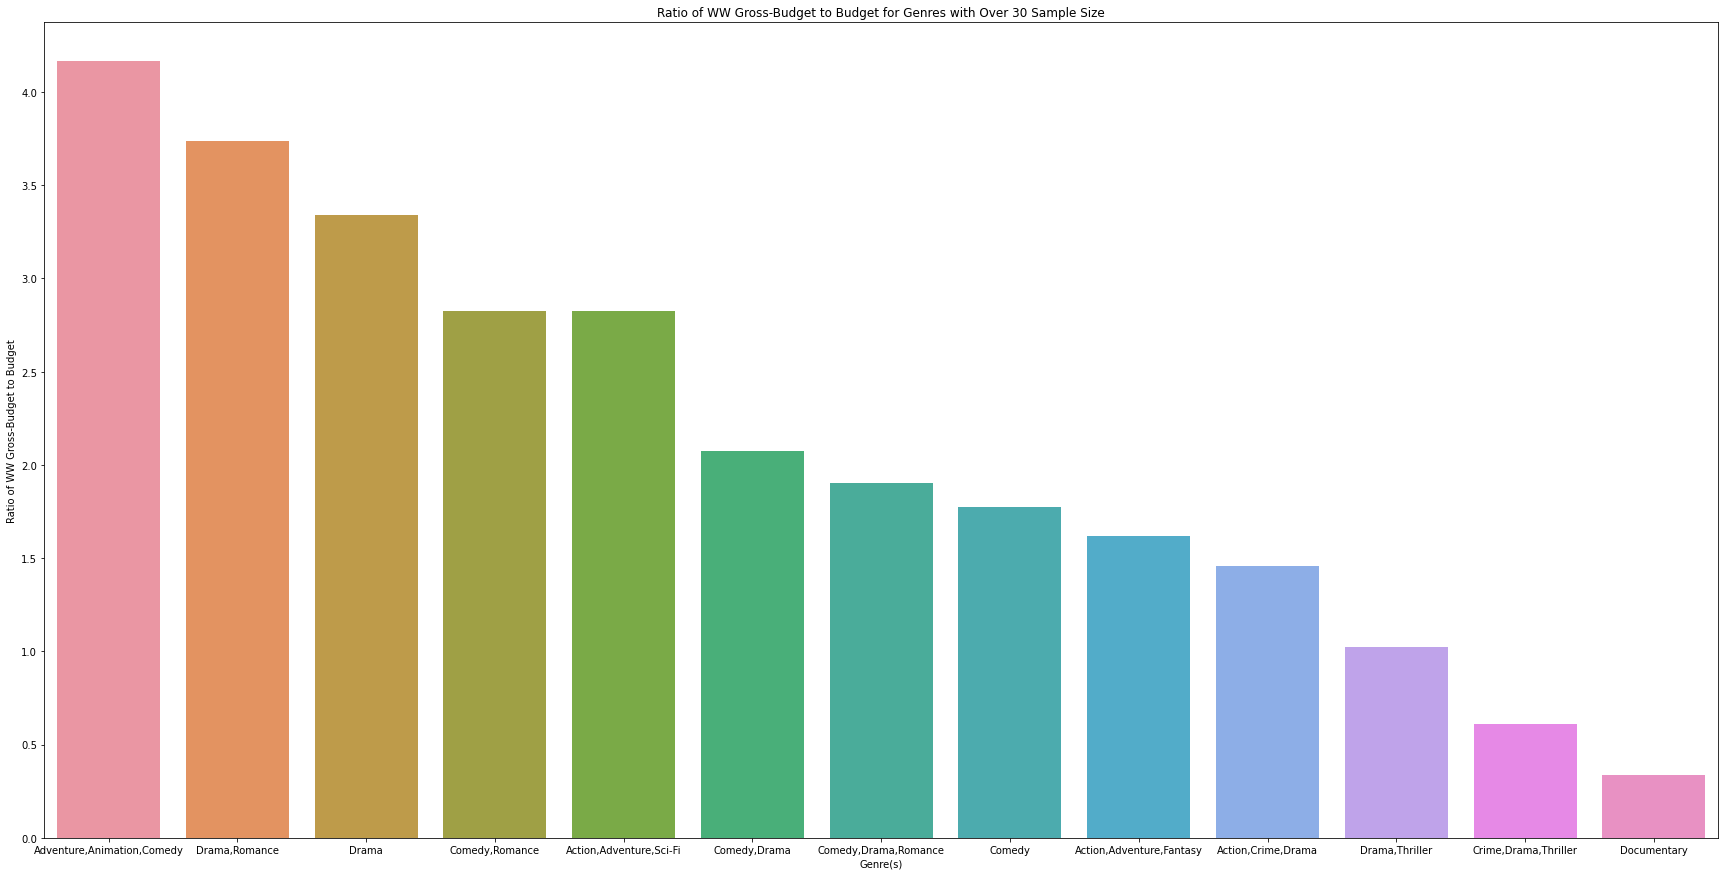

In [367]:
fig, ax = plt.subplots(figsize=(30,15))

sns.barplot(x=genres_over_30_means.index, y=genres_over_30_means['Ratio G-B to Budget'])

ax.set_title('Ratio of WW Gross-Budget to Budget for Genres with Over 30 Sample Size')
ax.set_xlabel('Genre(s)')
ax.set_ylabel('Ratio of WW Gross-Budget to Budget');

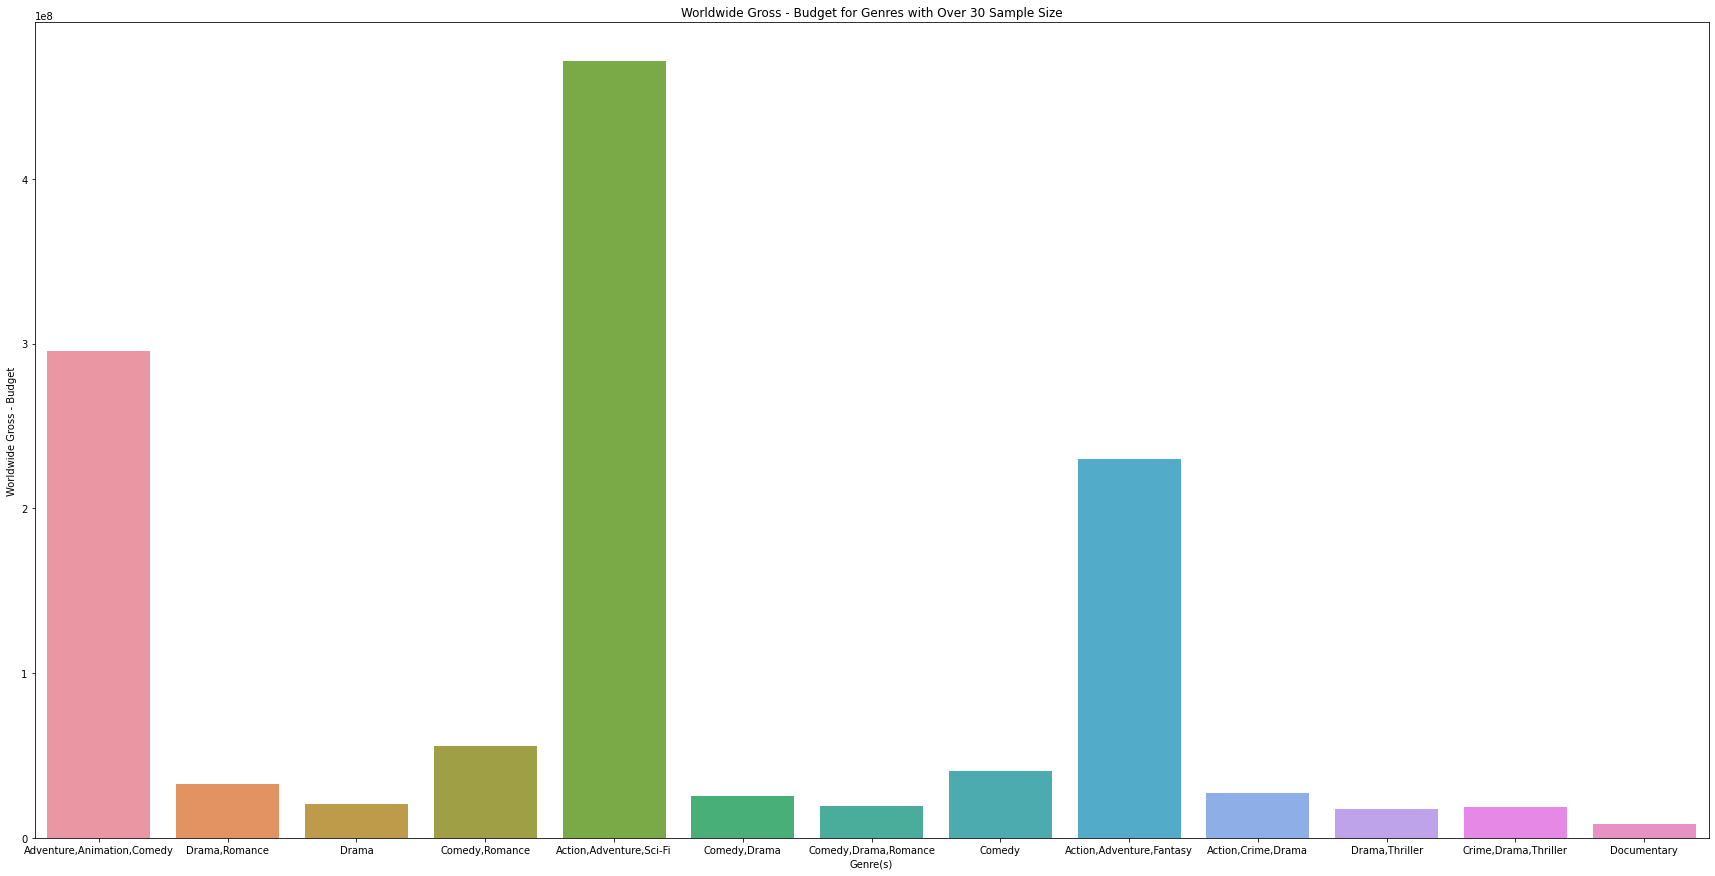

In [368]:
fig, ax = plt.subplots(figsize=(30,15))

sns.barplot(x=genres_over_30_means.index, y=genres_over_30_means['WW Gross-Budget'])

ax.set_title('Worldwide Gross - Budget for Genres with Over 30 Sample Size')
ax.set_xlabel('Genre(s)')
ax.set_ylabel('Worldwide Gross - Budget');

In [337]:
budgets_top_rated_merged.groupby('genres').mean().sort_values(by='Ratio G-B to Budget', ascending=False)

,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,averagerating,numvotes,WW Gross-Budget,Ratio G-B to Budget,month_release
genres,,,,,,,,,,,
"Biography,Documentary",34.333333,8.636000e+06,3.426567e+07,8.933333e+07,2012.666667,81.333333,7.200000,329.666667,8.069733e+07,103.118104,10.666667
"Drama,Family,Fantasy",44.500000,4.895000e+07,1.430757e+08,3.990714e+08,2015.000000,105.000000,6.900000,142792.000000,3.501214e+08,47.260224,2.500000
"Crime,Drama,Family",52.000000,3.275000e+07,1.039735e+08,2.088380e+08,2016.500000,96.500000,6.300000,1766.500000,1.760880e+08,33.529686,7.000000
"Documentary,Sport",41.500000,5.000000e+05,1.584683e+07,1.593700e+07,2012.000000,84.000000,7.900000,1716.500000,1.543700e+07,30.874004,10.000000
Horror,53.083333,1.388033e+07,2.632934e+07,5.480404e+07,2013.916667,90.750000,5.591667,52214.666667,4.092370e+07,27.992425,7.333333
...,...,...,...,...,...,...,...,...,...,...,...
"Documentary,Sport,Thriller",91.000000,6.000000e+06,0.000000e+00,0.000000e+00,2017.000000,120.000000,7.900000,28979.000000,-6.000000e+06,-1.000000,2.000000
Adventure,48.000000,8.000000e+06,0.000000e+00,0.000000e+00,2016.000000,102.000000,7.900000,240.000000,-8.000000e+06,-1.000000,6.000000
"Comedy,Horror,Thriller",39.000000,2.000000e+05,0.000000e+00,0.000000e+00,2012.000000,82.000000,5.400000,150.000000,-2.000000e+05,-1.000000,8.000000


In [315]:
budgets_top_rated_merged.groupby('averagerating').mean().sort_values(by='Ratio G-B to Budget', ascending=False).head(20)

,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,numvotes,WW Gross-Budget,Ratio G-B to Budget
averagerating,,,,,,,,,
8.5,34.500000,5.696667e+07,1.215408e+08,4.162094e+08,2014.500000,142.666667,2.404142e+05,3.592427e+08,11.168084
8.0,64.700000,5.685500e+07,1.195152e+08,3.423400e+08,2014.600000,122.157895,3.529020e+05,2.854850e+08,7.776439
7.0,54.205128,4.827975e+07,7.362789e+07,1.748455e+08,2013.769231,109.935897,1.375936e+05,1.265658e+08,7.337034
5.3,54.760000,3.009198e+07,2.194224e+07,5.118770e+07,2014.480000,101.795918,2.839242e+04,2.109572e+07,6.313725
8.3,53.200000,5.236000e+07,1.060480e+08,3.356509e+08,2013.000000,128.000000,2.284612e+05,2.832909e+08,5.877507
7.4,53.018868,3.362830e+07,6.253707e+07,1.452877e+08,2014.509434,115.245283,1.340911e+05,1.116594e+08,5.259237
7.5,52.261905,5.165298e+07,8.547475e+07,2.116481e+08,2014.071429,115.928571,1.603257e+05,1.599951e+08,5.227058
8.2,72.285714,4.764286e+07,9.475588e+07,2.246567e+08,2013.857143,123.571429,3.810527e+05,1.770139e+08,4.903885
7.7,53.250000,4.616875e+07,8.989203e+07,1.981354e+08,2013.656250,110.967742,2.522295e+05,1.519667e+08,4.550714


In [316]:
budgets_top_rated_merged['release_date'] = pd.to_datetime(budgets_top_rated_merged['release_date'])

budgets_top_rated_merged['month_release'] = budgets_top_rated_merged['release_date'].dt.month

In [317]:
budgets_top_rated_merged

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,WW Gross-Budget,Ratio G-B to Budget,month_release
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2351345279,5.532577,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",6.6,447624.0,635063875,1.546673,5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0,-200237650,-0.572108,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0,1072413963,3.243841,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999721747,3.153696,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,78,2018-12-31,Red 11,7000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7000,-1.000000,12
5948,79,1999-04-02,Following,6000,48482,240495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234495,39.082500,4
5949,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3662,-0.732400,7
5950,81,2015-09-29,A Plague So Pleasant,1400,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1400,-1.000000,9


In [318]:
budgets_top_rated_merged.groupby('month_release').mean().sort_values(by='Ratio G-B to Budget', ascending=False).head(20)

,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,averagerating,numvotes,WW Gross-Budget,Ratio G-B to Budget
month_release,,,,,,,,,,
6,50.172414,4.258913e+07,6.455078e+07,1.394865e+08,2013.820513,107.576923,6.555128,116373.070513,9.689734e+07,6.688952
7,50.305804,4.234087e+07,6.018676e+07,1.395917e+08,2013.691275,107.751678,6.493289,122535.879195,9.725078e+07,5.011345
8,52.684932,2.530866e+07,3.187131e+07,6.056386e+07,2013.627329,104.428571,6.424224,81686.981366,3.525521e+07,4.316300
5,50.554217,4.700319e+07,6.608007e+07,1.608794e+08,2013.795276,110.650794,6.476378,138726.086614,1.138762e+08,4.281244
10,50.283784,2.036409e+07,2.397414e+07,4.887986e+07,2013.638743,107.863874,6.536126,87019.324607,2.851577e+07,4.001994
11,49.755511,4.255436e+07,5.869909e+07,1.370940e+08,2013.988304,112.335294,6.750292,133543.239766,9.453961e+07,3.617227
2,50.580000,2.783799e+07,3.501112e+07,7.048388e+07,2014.183206,105.369231,6.347328,85028.038168,4.264589e+07,3.474553
4,50.859275,2.377374e+07,2.690915e+07,5.916106e+07,2013.670588,106.541176,6.457647,72078.305882,3.538732e+07,3.452367
3,49.960744,3.228632e+07,4.119624e+07,8.711041e+07,2013.946746,105.922619,6.426036,97323.733728,5.482410e+07,3.422738


In [319]:
merged_basics_and_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,month_release,WW Gross-Budget,Ratio G-B to Budget,Ratio_Cat
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,12,2351345279,5.532577,High Profit
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",5,635063875,1.546673,Medium Profit
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",6,-200237650,-0.572108,Loss
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",5,1072413963,3.243841,High Profit
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,NaN,NaN,NaN,NaN,NaN,NaN,12,999721747,3.153696,High Profit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7216,78,2018-12-31,Red 11,7000,0,0,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",12,-7000,-1.000000,Loss
7217,79,1999-04-02,Following,6000,48482,240495,NaN,NaN,NaN,NaN,NaN,NaN,4,234495,39.082500,High Profit
7218,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,NaN,NaN,NaN,NaN,NaN,NaN,7,-3662,-0.732400,Loss
7219,81,2015-09-29,A Plague So Pleasant,1400,0,0,tt2107644,A Plague So Pleasant,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller",9,-1400,-1.000000,Loss


In [320]:
contingency_table=pd.crosstab(index=merged_basics_and_budgets["genres"],columns=merged_basics_and_budgets["Ratio_Cat"])

In [321]:
contingency_table

Ratio_Cat,High Profit,Loss,Low Profit,Medium Profit
genres,,,,
Action,9,21,11,5
"Action,Adventure",1,2,1,2
"Action,Adventure,Animation",8,1,3,5
"Action,Adventure,Biography",0,1,2,2
"Action,Adventure,Comedy",11,10,3,9
...,...,...,...,...
"Sci-Fi,Thriller",2,3,1,2
Sport,0,2,1,0
Thriller,14,38,17,12


In [322]:
stats.contingency.chi2_contingency(contingency_table)

(1288.6980150823767,
 7.431938546370244e-08,
 1032,
 array([[ 9.78252738, 18.79080951,  8.22174726,  9.20491584],
        [ 1.27598183,  2.45097515,  1.07240182,  1.2006412 ],
        [ 3.61528186,  6.9444296 ,  3.03847181,  3.40181672],
        ...,
        [17.22575474, 33.08816457, 14.47742453, 16.20865616],
        [ 0.85065456,  1.63398344,  0.71493454,  0.80042746],
        [ 1.70130911,  3.26796687,  1.42986909,  1.60085493]]))

In [475]:
df_runtime = pd.read_sql("""

SELECT *
FROM movie_basics 

""", imdbconn)

In [476]:
df_runtime

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [478]:
df_runtime.loc[df_runtime['runtime_minutes'] < 2]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
2570,tt10265824,Lamentation For Little Girls Who Are In Love W...,Lamentation For Little Girls Who Are In Love W...,2019,1.0,Animation
3298,tt10326116,Happy New Year,Happy New Year,2019,1.0,Animation
22903,tt1935926,Tierra,Tierra,2010,1.0,"Documentary,Family"
54307,tt3194766,Guerreiros da paz e poesia: It All Depends on Us,Guerreiros da paz e poesia: It All Depends on Us,2013,1.0,"Documentary,Music"
57140,tt3331660,Shark Sanctuary,Shark Sanctuary,2012,1.0,"Adventure,Documentary"
60809,tt3515578,November,November,2014,1.0,"Documentary,History"
72190,tt4122866,Powered By Green Smoothies,Powered By Green Smoothies,2014,1.0,"Adventure,Documentary,Sport"
93214,tt5430316,Great Valley Nature Center Documentary,Great Valley Nature Center Documentary,2015,1.0,Documentary
95787,tt5589268,A Serendipitous Exploration,A Serendipitous Exploration,2016,1.0,Documentary
98755,tt5773518,Isa One Minute Portrait,Isa One Minute Portrait,2016,1.0,Documentary


In [501]:
df_runtime['Runtime_cat'] = ['Extremly short Movie' if x < 20 else 'Short Movie' if x < 90 else 'Average Movie' if x < 120 else 'Long Movie' for x in df_runtime['runtime_minutes'] ]

In [521]:
movie_basics['start_year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

In [527]:
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [528]:
budgets['release_date'] = pd.to_datetime(budgets['release_date'])
budgets['release_month'] = budgets['release_date'].dt.month
budgets['release_year'] = budgets['release_date'].dt.year

In [529]:
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,12,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,12,2018
5778,79,1999-04-02,Following,6000,48482,240495,4,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,7,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,9,2015


In [534]:
budgets['Worldwide Gross-Budget'] = budgets['worldwide_gross'] - budgets['production_budget']
budgets['Ratio of Gross-Budget to Budget'] = budgets['Worldwide Gross-Budget'] / budgets['production_budget']

In [543]:
budgets['Ratio_Category'] = ['Loss' if x < 0 
                             else 'Low Profit' if x < 1 
                             else 'Medium Profit' if x < 3 
                             else 'High Profit' 
                             for x in budgets['Ratio of Gross-Budget to Budget']]

In [545]:
budgets.sort_values(by='Ratio of Gross-Budget to Budget', ascending=False).head(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,Worldwide Gross-Budget,Ratio of Gross-Budget to Budget,Ratio_Category
5745,46,1972-06-30,Deep Throat,25000,45000000,45000000,6,1972,44975000,1799.000000,High Profit
5613,14,1980-03-21,Mad Max,200000,8750000,99750000,3,1980,99550000,497.750000,High Profit
5492,93,2009-09-25,Paranormal Activity,450000,107918810,194183034,9,2009,193733034,430.517853,High Profit
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,7,2015,41556474,415.564740,High Profit
5406,7,1999-07-14,The Blair Witch Project,600000,140539099,248300000,7,1999,247700000,412.833333,High Profit
5709,10,2004-05-07,Super Size Me,65000,11529368,22233808,5,2004,22168808,341.058585,High Profit
5346,47,1942-08-13,Bambi,858000,102797000,268000000,8,1942,267142000,311.354312,High Profit
5773,74,1993-02-26,El Mariachi,7000,2040920,2041928,2,1993,2034928,290.704000,High Profit
5676,77,1968-10-01,Night of the Living Dead,114000,12087064,30087064,10,1968,29973064,262.921614,High Profit
5210,11,1976-11-21,Rocky,1000000,117235147,225000000,11,1976,224000000,224.000000,High Profit


In [550]:
contingency_table=pd.crosstab(index=budgets['release_month'],columns=budgets['Ratio_Category'])
contingency_table.sort_values(by='High Profit', ascending=False)

Ratio_Category,High Profit,Loss,Low Profit,Medium Profit
release_month,,,,
12,162,308,120,155
11,140,144,86,116
6,135,145,75,124
7,123,124,76,117
10,117,232,115,109
5,112,139,61,95
8,106,179,101,110
3,100,180,84,106
2,97,148,66,81


In [548]:
stats.contingency.chi2_contingency(contingency_table)

(99.26782830878662,
 1.4823199054062537e-08,
 33,
 array([[ 80.83863715, 127.52940159,  62.17433414,  76.45762712],
        [ 91.3220339 , 144.06779661,  70.23728814,  86.37288136],
        [109.49325493, 172.73434798,  84.21307506, 103.55932203],
        [105.76582497, 166.85402975,  81.34624697, 100.03389831],
        [ 94.81649948, 149.58059495,  72.92493947,  89.6779661 ],
        [111.58993428, 176.04202698,  85.82566586, 105.54237288],
        [102.50432376, 161.7087513 ,  78.8377724 ,  96.94915254],
        [115.55032861, 182.2898651 ,  88.8716707 , 109.28813559],
        [114.85143549, 181.18730543,  88.33414044, 108.62711864],
        [133.48858526, 210.58889658, 102.66828087, 126.25423729],
        [113.22068488, 178.61466621,  87.07990315, 107.08474576],
        [173.55845728, 273.80231754, 133.48668281, 164.15254237]]))

In [555]:
contingency_table=pd.crosstab(index=budgets['release_year'],columns=budgets['Ratio_Category'])
contingency_table.sort_values(by='High Profit', ascending=False).head(20)

Ratio_Category,High Profit,Loss,Low Profit,Medium Profit
release_year,,,,
2012,58,84,41,52
2015,57,194,40,47
2006,56,85,66,53
2016,54,72,36,57
2017,52,45,29,42
2013,51,88,33,66
2018,50,37,26,30
2014,50,118,29,58
2011,49,93,47,65


In [552]:
stats.contingency.chi2_contingency(contingency_table)

(590.1264023250718,
 1.8865140979161838e-23,
 285,
 array([[  0.23296437,   0.36751989,   0.17917676,   0.22033898],
        [  0.46592874,   0.73503978,   0.35835351,   0.44067797],
        [  0.23296437,   0.36751989,   0.17917676,   0.22033898],
        [  0.46592874,   0.73503978,   0.35835351,   0.44067797],
        [  0.23296437,   0.36751989,   0.17917676,   0.22033898],
        [  0.23296437,   0.36751989,   0.17917676,   0.22033898],
        [  0.23296437,   0.36751989,   0.17917676,   0.22033898],
        [  0.23296437,   0.36751989,   0.17917676,   0.22033898],
        [  0.69889312,   1.10255967,   0.53753027,   0.66101695],
        [  0.23296437,   0.36751989,   0.17917676,   0.22033898],
        [  0.23296437,   0.36751989,   0.17917676,   0.22033898],
        [  0.69889312,   1.10255967,   0.53753027,   0.66101695],
        [  0.23296437,   0.36751989,   0.17917676,   0.22033898],
        [  0.46592874,   0.73503978,   0.35835351,   0.44067797],
        [  0.69889312,   